In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [3]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.shape

(5000, 7)

In [5]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [6]:
df.drop(columns="Address" , inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


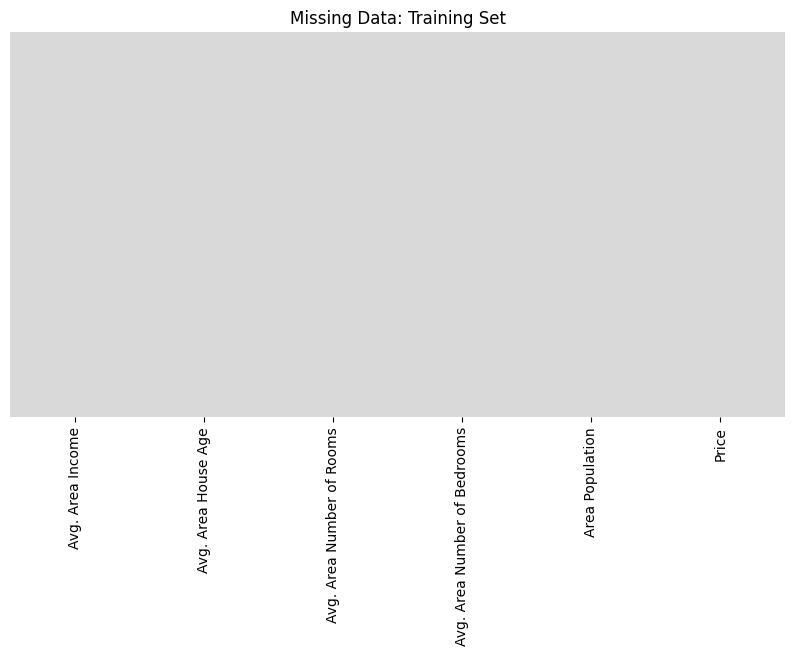

In [8]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3-Q1
print("The interquartile range is: ", IQR)

The interquartile range is:  473633.0691627944


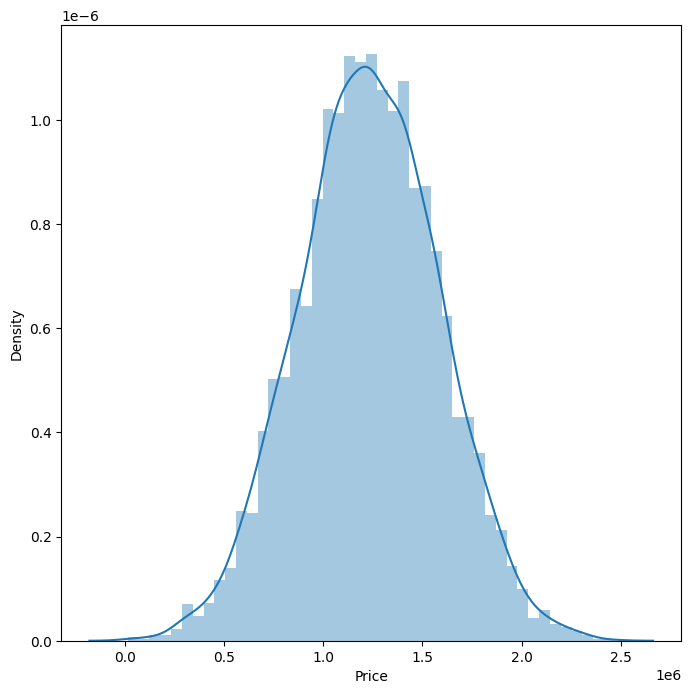

In [11]:
plt.figure(figsize=(8,8))
sns.distplot(df['Price'])
plt.show()

In [12]:
# sns.relplot(x="Avg. Area Income", y="Avg. Area House Age", hue="Price", style="Price",kind="line", data=df) # scatter can be used instead of "line" plot
# plt.show()

<Figure size 800x800 with 0 Axes>

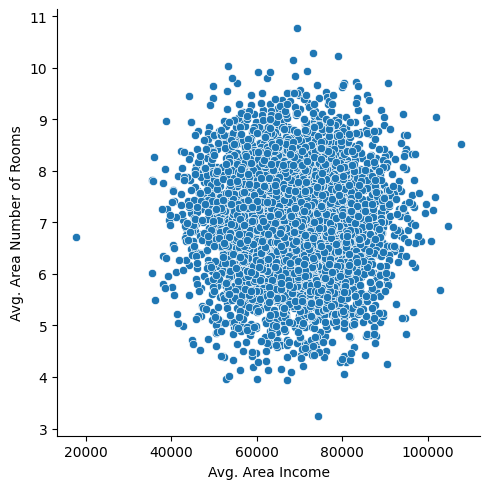

In [13]:
plt.figure(figsize=(8,8))
sns.relplot(x="Avg. Area Income", y="Avg. Area Number of Rooms", data=df)
plt.show()

<Figure size 800x800 with 0 Axes>

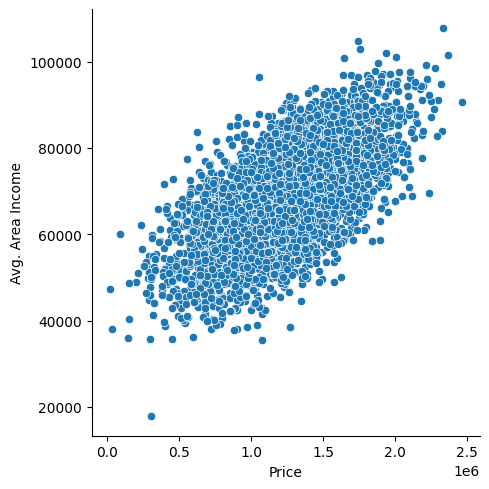

In [14]:
plt.figure(figsize=(8,8))
sns.relplot(x="Price", y="Avg. Area Income", data=df)
plt.show()

In [15]:
# plt.figure(figsize=(8,8))
# sns.swarmplot(x="Price", y="Avg. Area Income", data=df)
# plt.show()

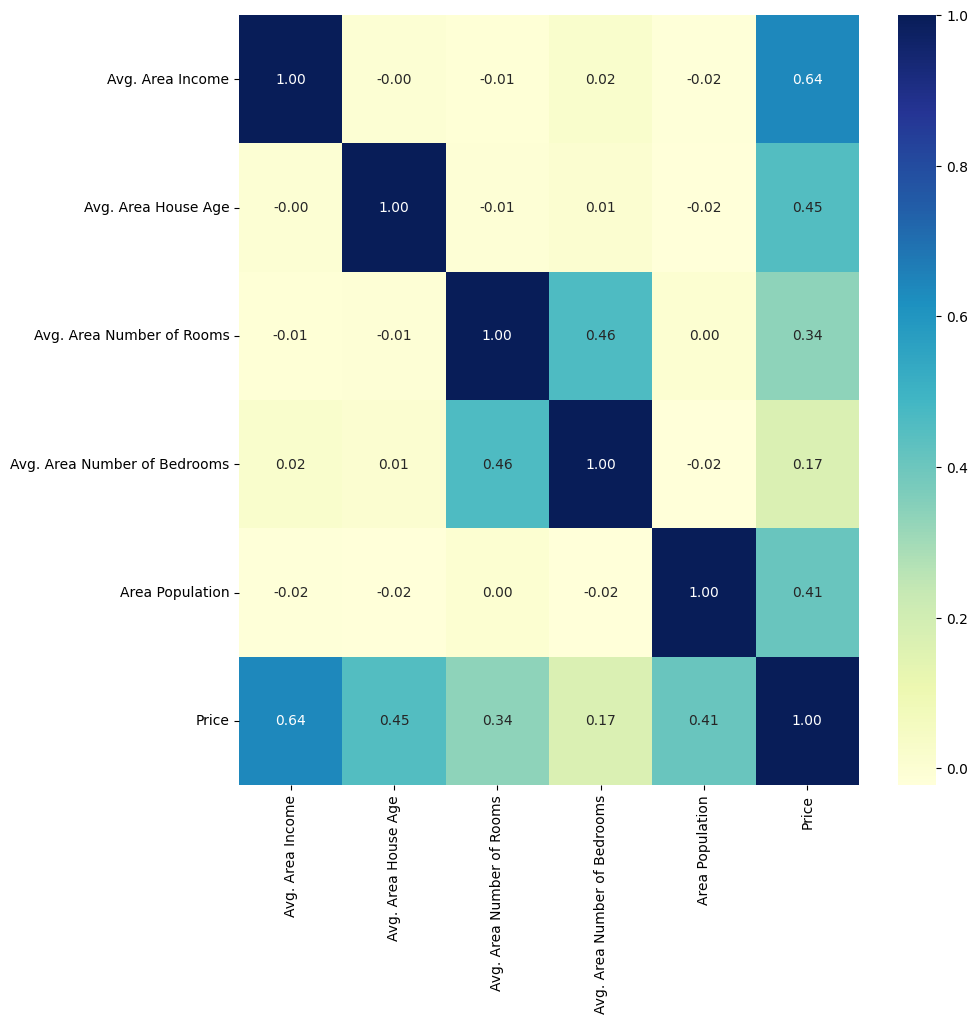

In [16]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

In [34]:
x = df.drop(columns="Price")
y = df["Price"]

In [35]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [39]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_tranform = std.fit_transform(x)

numpy_array = y.values 
y_reshape = numpy_array.reshape(-1, 1)

y_tranform = std.fit_transform(y_reshape)

In [40]:
y_tranform

array([[-0.49008146],
       [ 0.77550829],
       [-0.49021053],
       ...,
       [-0.570244  ],
       [-0.0946402 ],
       [ 0.18941143]])

In [25]:
x_tranform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_tranform,y_tranform,test_size=0.2,random_state=101)

In [27]:
x_train

array([[ 0.04369732,  0.64809109, -0.8590542 ,  0.2825495 ,  0.06588164],
       [-0.06720597, -0.58832923,  2.35771467,  1.18205319,  0.70118875],
       [-1.12104293, -0.48373589,  0.1333159 ,  1.71689322,  1.14642906],
       ...,
       [-1.21622414, -2.26082045, -0.11881994, -1.36248876,  2.72262263],
       [-0.51972297, -0.04232647, -1.06821454,  0.09616586, -0.34643377],
       [ 0.60952689,  1.68209486,  1.44465262,  0.2825495 ,  2.01366478]])

In [28]:
y_train

array([[ 0.2071404 ],
       [ 0.47832649],
       [-0.5195187 ],
       ...,
       [-0.36657611],
       [-1.03934158],
       [ 2.48186748]])

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

dl = LinearRegression()
dl.fit(x_train, y_train)
 

LinearRegression()

In [30]:
lin_pre = dl.predict(x_test)
lin_pre

array([[ 7.32041057e-02],
       [-1.16108970e+00],
       [ 1.44044713e+00],
       [-7.35297452e-01],
       [-6.75905821e-01],
       [-1.66518276e+00],
       [-4.47943319e-01],
       [-1.06345925e+00],
       [ 6.03954356e-01],
       [-7.85382400e-02],
       [ 6.33619413e-01],
       [ 1.88296044e-01],
       [ 1.42700913e+00],
       [ 2.96965092e-01],
       [ 4.40590685e-01],
       [-2.73841993e-02],
       [-1.75111113e+00],
       [-7.59423795e-01],
       [-3.08011000e-02],
       [-9.62978808e-02],
       [-2.05677467e+00],
       [ 1.52098781e+00],
       [ 1.76108655e+00],
       [-8.97896833e-02],
       [-4.72817582e-01],
       [ 1.64256621e+00],
       [ 1.51979807e+00],
       [ 5.88667787e-01],
       [ 4.39499053e-01],
       [ 8.75449510e-01],
       [-1.43211322e+00],
       [ 1.47961236e+00],
       [ 6.51726422e-01],
       [-5.84771555e-01],
       [ 1.49693747e-01],
       [-8.91061508e-01],
       [-1.27521835e-01],
       [-6.59171344e-01],
       [ 2.7

(5000,)

In [32]:
y_test.shape

(1000, 1)

In [44]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, lin_pre))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
          0.06 |          0.07
         -1.02 |         -1.16
          1.32 |          1.44
         -0.48 |         -0.74
         -0.80 |         -0.68
         -1.42 |         -1.67
         -0.18 |         -0.45
         -1.49 |         -1.06
          0.76 |          0.60
          0.16 |         -0.08
          0.59 |          0.63
          0.13 |          0.19
          1.48 |          1.43
          0.79 |          0.30
          0.59 |          0.44
         -0.32 |         -0.03
         -1.43 |         -1.75
         -0.26 |         -0.76
         -0.45 |         -0.03
          0.44 |         -0.10
         -2.34 |         -2.06
          0.62 |          1.52
          1.54 |          1.76
         -0.09 |         -0.09
         -0.36 |         -0.47
          1.71 |          1.64
          1.60 |          1.52
          0.54 |          0.59
          0.38 |          0.44
          0.74 |          0.88
     

In [46]:
residual = actual- lin_pre.reshape(-1)
print(residual)

[-1.97469102e-01  1.03682470e+00 -1.56471213e+00  6.11032455e-01
  5.51640825e-01  1.54091776e+00  3.23678323e-01  9.39194255e-01
 -7.28219352e-01 -4.57267561e-02 -7.57884409e-01 -3.12561040e-01
 -1.55127413e+00 -4.21230088e-01 -5.64855681e-01 -9.68807968e-02
  1.62684613e+00  6.35158799e-01 -9.34638960e-02 -2.79671152e-02
  1.93250968e+00 -1.64525280e+00 -1.88535155e+00 -3.44753127e-02
  3.48552586e-01 -1.76683121e+00 -1.64406306e+00 -7.12932783e-01
 -5.63764049e-01 -9.99714506e-01  1.30784823e+00 -1.60387736e+00
 -7.75991418e-01  4.60506559e-01 -2.73958743e-01  7.66796512e-01
  3.25683927e-03  5.34906348e-01 -4.00302555e-01  1.14988846e+00
 -5.80813994e-01  1.72758582e+00  1.03532093e+00 -2.00331822e+00
 -1.37028378e+00  6.26682276e-01  1.65746976e-01  1.11984970e+00
  7.68650731e-02 -8.04910985e-01 -7.63164317e-01  7.15344461e-02
  2.51338562e-01 -4.81220832e-01  9.83037567e-01  5.71749331e-01
  1.83734357e-01 -1.85060956e-01 -6.79962638e-01  1.95165163e+00
 -7.77779547e-01  2.25025

<Axes: ylabel='Density'>

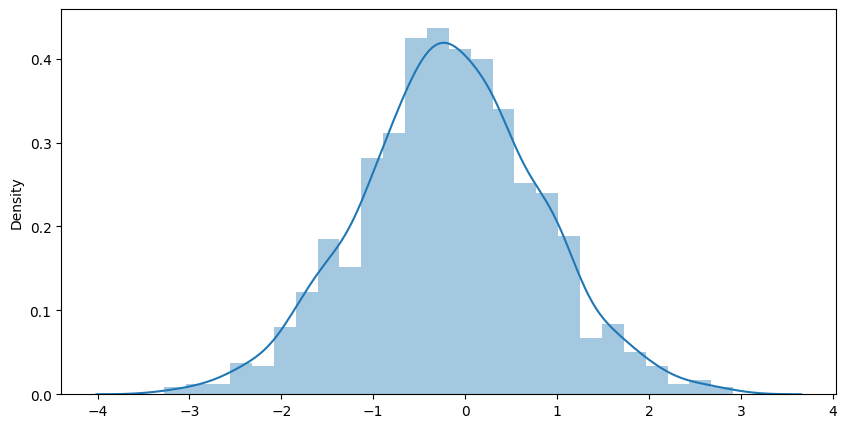

In [47]:
sns.distplot(residual, kde=True)

In [48]:
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, lin_pre)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 0.08101725519794248
Root Mean Squared Error: 0.2846353020936484


Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)

Decision Tree Regression :  0.25342323993904203


In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

Random Forest Regression :  0.12040883993826038


In [51]:
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(x_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(x_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  0.09939208700574813


In [52]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression": 0.08101725519794248,
    "Descison Tree": 0.25342323993904203,
    "Random Forest":0.12040883993826038,
    "Gradient Boosting": 0.09939208700574813
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])
# print(sorted_scores)
# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")

[('Linear Regression', 0.08101725519794248), ('Gradient Boosting', 0.09939208700574813), ('Random Forest', 0.12040883993826038), ('Descison Tree', 0.25342323993904203)]
Model Rankings (lower values are better):
1. Linear Regression: 0.08101725519794248
2. Gradient Boosting: 0.09939208700574813
3. Random Forest: 0.12040883993826038
4. Descison Tree: 0.25342323993904203
